In [1]:
election<- read.csv("../Data//election_2022.csv")
options(warn = -1)

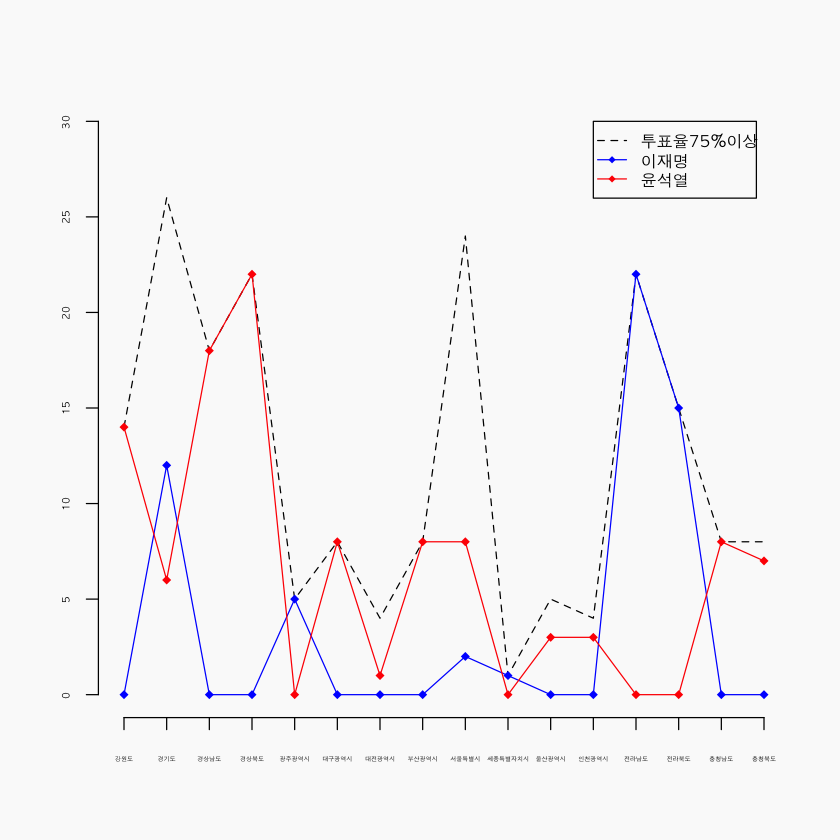

In [3]:
par(family = 'AppleGothic', bg = '#fafafa')

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 > 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 > 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트 <- subset(차트 , 이재명!= 0 | 윤석열 != 0 | 투표율 != 0 | 합계 != 0) # 모든 조건에 해당하지 않는 값 제거

plot(
    c(차트[,3]),
    main='광역시도 별 과반수 득표가 나온 시군구 갯수',
    type='l',
    ylab='시군구수',
    xlab='광역시도',
    cex.axis = 0.1,
    ylim=c(0,30),
    lty = 2,
    axes =F, #x,y 좌표 frame 제거
    ann=F, #x,y label 제거
   
)
axis(1,at=1:16, lab=colnames(t(차트)), cex.axis=0.3)
axis(2, cex.axis=0.5)

lines(
    c(차트[,1]),
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    c(차트[,2]),
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )